**Анализ данных игры**

***Цель проекта***

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Описание данных**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# **План исследования**

**1. Открыть файл с данными и изучить общую информацию**

**2. Подготовим данные**

- Заменим названия столбцов (приведите к нижнему регистру);
- Преобразуем данные в нужные типы. 
- Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.


**3. Проведем исследовательский анализ данных**

- Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмем данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитываем в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.
- Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишием результат.
- Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.
- Соотнесём выводы с продажами игр на других платформах.
- Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

**4. Составим портрет пользователя каждого региона**

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишем различия в долях продаж.
- Самые популярные жанры (топ-5). Поясним разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**5. Проверим гипотезы**

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**6. Напишем общий вывод**

## **1. Открыть файл с данными и изучить общую информацию**

In [1]:
# Импортируем библиотеку для общего удобства
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
# для работы с проектом, и для проверки ретвьюера
try:
    games = pd.read_csv('/datasets/games.csv')
except:
    games = pd.read_csv('games.csv') 

In [3]:
# выведем первые 5 строк датафрейма
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Промежуточный вывод**

После вывода данных мы можем увидеть типы данных и наличие пропусков

In [4]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Промежуточный вывод**

Можно увидеть что здесь нет лишних данных, т.к. данные более менее логичные, остальное мы увидим после обработки и заполнения пустых занчений

In [5]:
# посмотрим число дубликатов и проверим количество строк, а так же типы
print('Число дубликатов:', games.duplicated().sum())
print()
games.info()

Число дубликатов: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Промежуточный вывод**

Видим количество строк и типы данных.

In [6]:
# Выведем пустые значения в датафрейме
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

**Промежуточный вывод**

Здесь мы видим количство пропусков в нескольких столбцах, попробуем изменить данные показатели

## **2. Подготовим данные**

In [7]:
# Приведем столбцы к нижнему регистру
games.columns = games.columns.str.lower()
# Проверяем преобразование
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
# Выведем данные по пропускам названий, и видим, что в коллоне genre 2 пропуска
games[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
na_sales = games.loc[games['year_of_release'].isna(), 'na_sales'].max()
print(f'Количество продаж в Северной америке {na_sales}')
eu_sales = games.loc[games['year_of_release'].isna(), 'eu_sales'].max()
print(f'Количество продаж в Европе {eu_sales}')
jp_sales = games.loc[games['year_of_release'].isna(), 'jp_sales'].max()
print(f'Количество продаж в Японии {jp_sales}')
other_sales = games.loc[games['year_of_release'].isna(),'other_sales'].max()
print(f'Количество продаж в др. странах {other_sales}')

Количество продаж в Северной америке 4.26
Количество продаж в Европе 2.36
Количество продаж в Японии 0.77
Количество продаж в др. странах 0.71


In [10]:
# Удалим строки где были пропущены года(потеря 1.6%). 
# Так как мы не сможешь заполнить дату релиза без доп. данных
games.dropna(subset=['year_of_release'], inplace=True)
# Так же мы не сможешь заполнить название релиза и жанр без доп. данных
games.dropna(subset=['name'], inplace=True)

In [11]:
# Посмотрим сколько остлось значений
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


**Промежуточный вывод**

После предворительной обработки нам осталось:
- year_of_release заменить тип данных на int
- user_score так же есть абривиатура 'tbm' - To Be Determined(предстоит изучить), значит у данных позициях нет еще оценки, поэтому заменим на NaN
- critic_score и user_score мы заполним маедианой так как оставлять пустыми значениями или 0 может повлиять на дальнейшую аналитику.Я посчитал правильным заполнить медианой по типу жанра игр, так как при определенном жанре идут примерные одинаковые значения.Так же заменим тип user_score на float
- rating пустые значения мы заполним 'unknown' так как мы не можем дать рейтинг игры самостоятельно

In [12]:
# Заменим тип данных на int
games['year_of_release'] = games['year_of_release'].astype('int')

In [13]:
# Заполним оценку критика по жанру медианным значением
for t in games['genre'].unique():
    games.loc[(games['genre'] == t) & 
              (games['critic_score'].isna()), 'critic_score'] = \
    games.loc[(games['genre'] == t), 'critic_score'].median()

In [14]:
games['critic_score'].unique()

array([76. , 69.5, 82. , 80. , 74. , 70. , 89. , 58. , 87. , 73. , 91. ,
       61. , 97. , 95. , 77. , 88. , 83. , 94. , 93. , 85. , 86. , 68. ,
       66. , 98. , 96. , 90. , 84. , 78. , 69. , 92. , 71. , 72. , 62. ,
       75. , 49. , 67. , 81. , 56. , 79. , 59. , 64. , 60. , 63. , 50. ,
       25. , 42. , 44. , 55. , 48. , 57. , 29. , 47. , 65. , 54. , 20. ,
       53. , 37. , 38. , 33. , 52. , 30. , 32. , 43. , 45. , 51. , 40. ,
       46. , 39. , 34. , 41. , 36. , 31. , 27. , 35. , 26. , 19. , 28. ,
       23. , 24. , 21. , 17. , 13. ])

In [15]:
games['critic_score'] = games['critic_score'].astype('int')

In [16]:
# Посмотрим сколько позиции с атрибутом 'tbd'
games[games['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,75,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,75,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,69,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,70,tbd,E


In [17]:
# Замена tbd, заполнение медианой, замена типа данных
games['user_score'] = games['user_score'].replace('tbd', np.NaN)

In [18]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [19]:
for t in games['genre'].unique():
    games.loc[(games['genre'] == t) & 
              (games['user_score'].isna()), 'user_score'] = \
    games.loc[(games['genre'] == t), 'user_score'].median()
games['user_score'] = games['user_score'].astype('float')

In [20]:
# Замена нулевых значеие рейтинга игр на 'неизвестный' для дальнейшего анализа
games['rating'] = games['rating'].replace(np.NaN, 'Unknown')

In [21]:
# Создадим столбец с общими продажами
games['total_sales'] = games[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

In [22]:
# Проверим все изменения и все заполнения данных
games.info()
games.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int32  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(6), int32(2), object(4)
memory usage: 1.5+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69,7.7,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74,7.8,Unknown,31.38


**Промежуточный вывод**

Мы убрали <2% данных, а так же заполнили пустые значения и заменили типы данных
Варианты по наличию пропусков:
- name, genre были пропущены 2 позици, скорее всего были допущены пропуски из-за того, что небыло определенного названия игры и жанра на дату релиза, но возможно так же не заполнили случайно, ни кто не исключает человеческий фактор.
- rating скорее всего на дату релиза не было объявлено о рейтинге игр, поэтому в базе данных их не окозалось
- в critic_score, user_score позиций было пропущено много, тут возможно люди не собрали еще данные по оценке критика и оценка пользователей по нашим играм до момента выпуска игр

## **3. Проведем исследовательский анализ данных**

### **3.1** Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

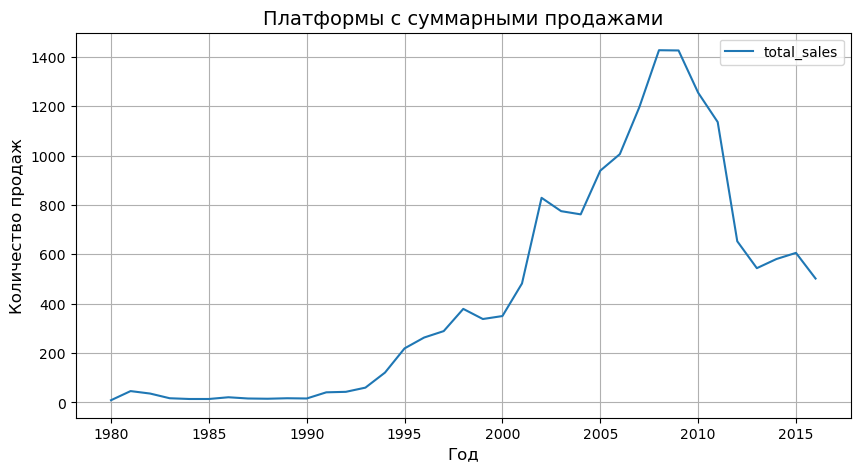

In [23]:
games.pivot_table(
    index='year_of_release', 
    values='total_sales', 
    aggfunc='count').plot(
        grid=True, figsize=(10, 5));
plt.title(label = "Платформы с суммарными продажами", fontsize = 14)
plt.ylabel("Количество продаж",  fontsize = 12)
plt.xlabel( "Год", size = 12);

**Промежуточный вывод**

Как мы видим по графику рост продаж игр начался с 2000х годов, затем идет небольшой застой на промежутке 2002-2004г. 

Рост и пик продаж был начиная с 2005 до 2009г.

Поэтому для анализа мы должны делать акцент на данные за последние 10 лет.

### **3.2** Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

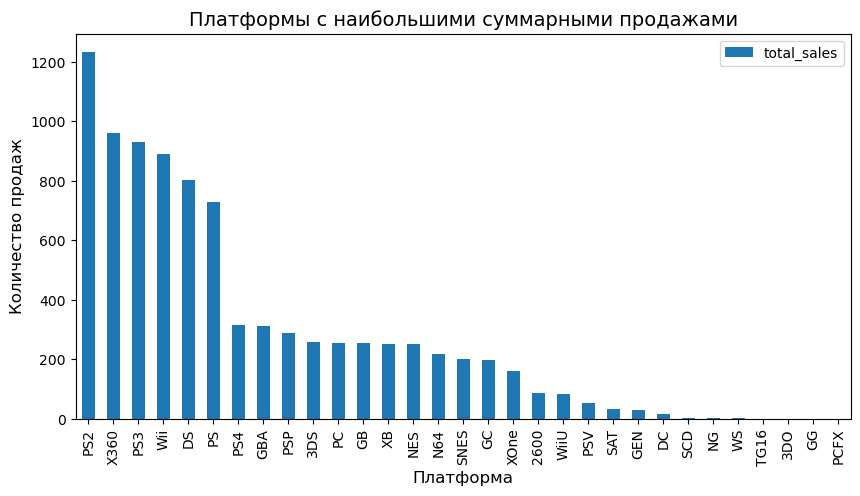

In [24]:
(
    games
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values('total_sales', ascending=False)
    .plot(kind='bar', figsize=(10, 5))
    )
plt.title(label = "Платформы с наибольшими суммарными продажами", fontsize = 14)
plt.ylabel("Количество продаж",  fontsize = 12)
plt.xlabel( "Платформа", size = 12);

**Промежуточный вывод**

Здесь мы можем увидеть платформы с наибольшими суммарными продажами, и мы можем выделить 6 платформ:PS2,X360,Wii,PS3,DS,PS

- Выберем платформы с наибольшими суммарными продажами и построим распределение по годам

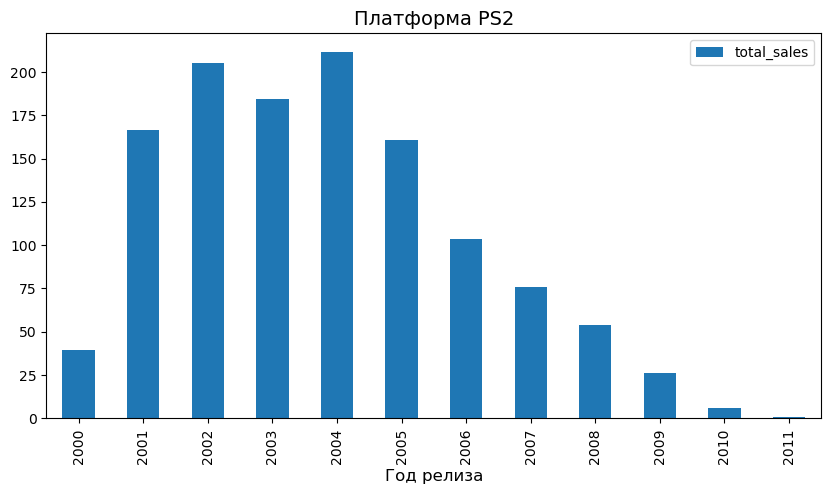

In [25]:
games_ps2 = games.loc[games['platform'] == 'PS2']
(
games_ps2
.pivot_table(index='year_of_release', values='total_sales',aggfunc='sum')
.plot(kind='bar', figsize=(10, 5)));
plt.title(label = "Платформа PS2", fontsize = 14)
plt.xlabel( "Год релиза", size = 12);

Стабильность продаж игр идет с 2001-2004гг.
С 2005г идет спад до 2011, дальше уже платформа считаеися не актуальной, так как упали продажи совсем

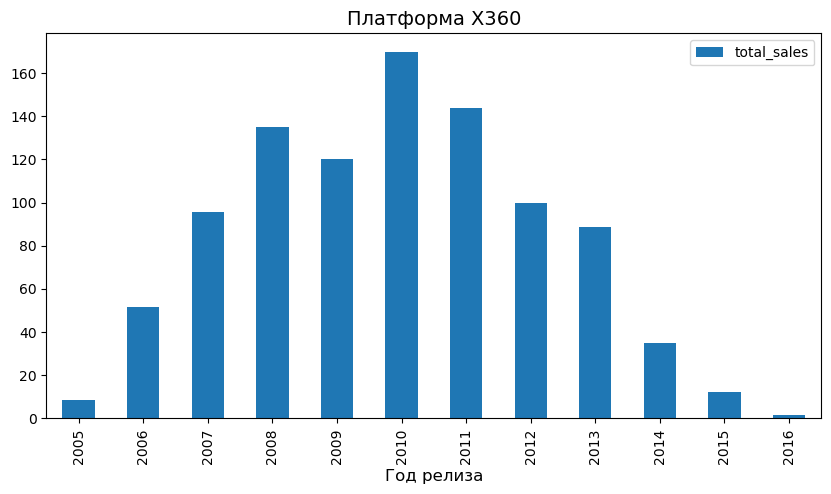

In [26]:
games_x360 = games.loc[games['platform'] == 'X360']
(
games_x360
.pivot_table(index='year_of_release', values='total_sales',aggfunc='sum')
.plot(kind='bar', figsize=(10, 5)));
plt.title(label = "Платформа X360", fontsize = 14)
plt.xlabel( "Год релиза", size = 12);

Пик продаж приходится на 2010 год. Дальше идет спад до 2016 года, что тоже показывает, что данная платформа в ближайшее время перестанет совсем быть актуальной

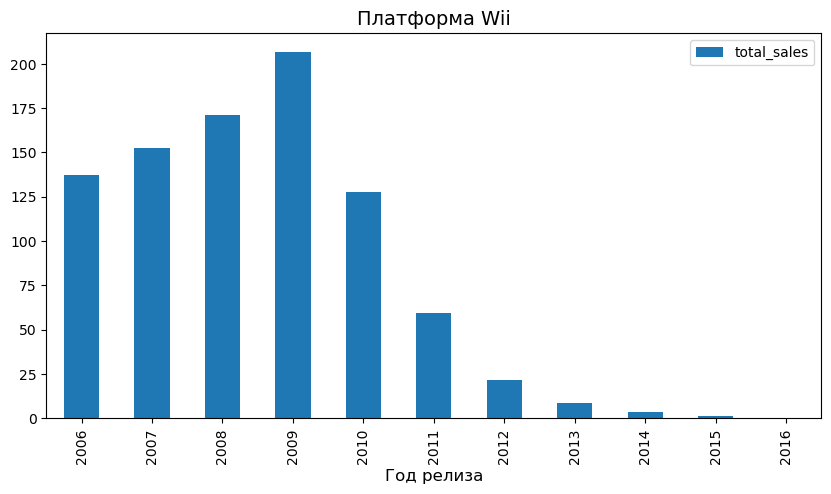

In [27]:
games_wii = games.loc[games['platform'] == 'Wii']
(
games_wii
.pivot_table(index='year_of_release', values='total_sales',aggfunc='sum')
.plot(kind='bar', figsize=(10, 5)));
plt.title(label = "Платформа Wii", fontsize = 14)
plt.xlabel( "Год релиза", size = 12);

На платформе Wii мы видим что пик продаж был 2009г. Затем так же наблюдается спад вплоть до 2016 гд мы видим, что данная платформа становится тоже уже не актуальной.

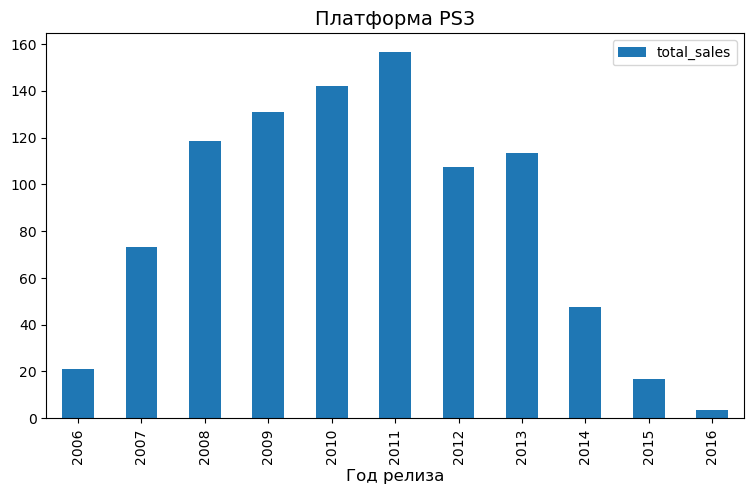

In [28]:
games_ps3 = games.loc[games['platform'] == 'PS3']
(
games_ps3
.pivot_table(index='year_of_release', values='total_sales',aggfunc='sum')
.plot(kind='bar', figsize=(9, 5)));
plt.title(label = "Платформа PS3", fontsize = 14)
plt.xlabel( "Год релиза", size = 12);

Здесь мы видишь не плохой подъем продаж с 2007 по 2011гг. Затем так же идет спад вплоть до 2016. Платформа тоже становится не актуальной.

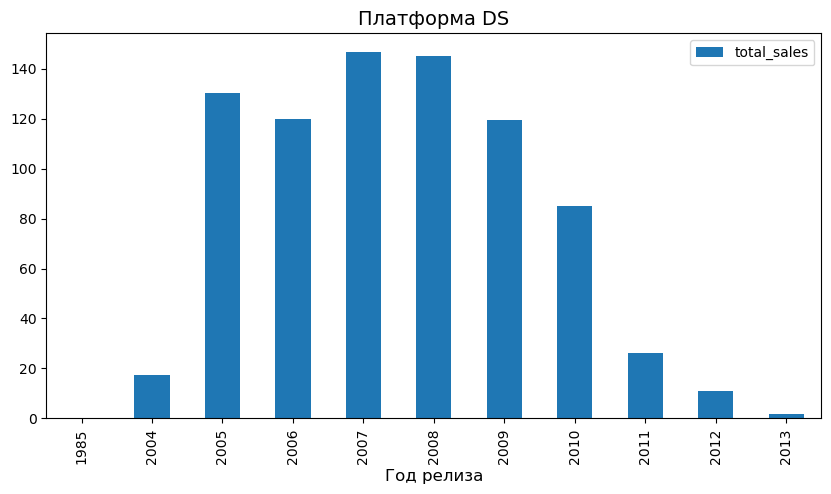

In [29]:

games_ds = games.loc[games['platform'] == 'DS']
(
games_ds
.pivot_table(index='year_of_release', values='total_sales',aggfunc='sum')
.plot(kind='bar', figsize=(10, 5)));
plt.title(label = "Платформа DS", fontsize = 14)
plt.xlabel( "Год релиза", size = 12);

In [30]:
ds_drop = games.drop(games.loc[(games['platform'] == 'DS') & (games['year_of_release'] == 1985)].index)

Можно сказать по платформе DS стабильность продаж с 2005 по 2009, затем идет спад с 2010 г. до 2013 затем и вовсе пропадают продажи на данной плотформе

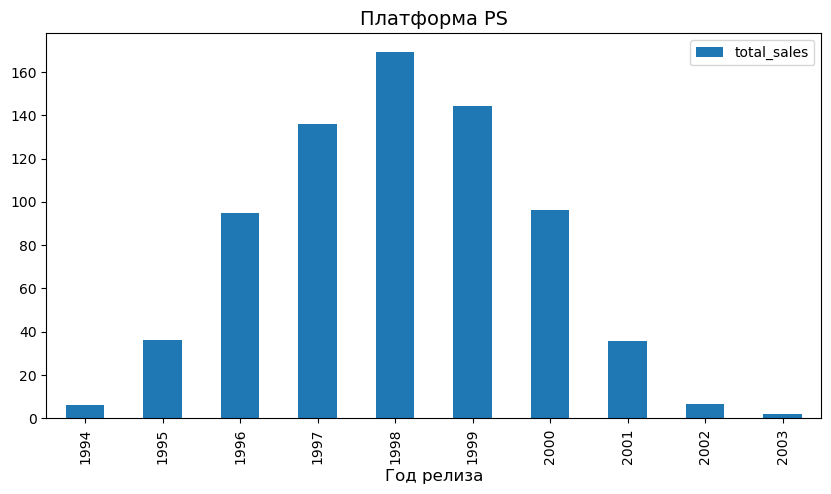

In [31]:
games_ps = games.loc[games['platform'] == 'PS']
(
games_ps
.pivot_table(index='year_of_release', values='total_sales',aggfunc='sum')
.plot(kind='bar', figsize=(10, 5)));
plt.title(label = "Платформа PS", fontsize = 14)
plt.xlabel( "Год релиза", size = 12);

На данной плотформе PS был хороший рос с 1994-х по 1998г. (Классика) С 1999 года мы видим спад продаж до 2003г. Дальше продаж нет по данной платформе

**За какой характерный срок появляются новые и исчезают старые платформы**
Этот вопрос является индивидуальны к каждой платформе, но но как мы можем увидеть по данным график появление новых консолей занимает в среднем 5 лет, а исчезают в течении 3 - 4х лет

### **3.3** Возьмем данные за соответствующий актуальный период.

Основной фактор — эти данные помогут построить прогноз на 2017 год. имеет смысл проводить анализ по последние 3 года(2016г.включительно), так как мы видели спад происходил после 2013 года.

In [32]:
# Отрез данных за 2014г., 2015г., 2016г.
games_actual = games.query('year_of_release >= 2014')

### **3.4** Какие платформы лидируют по продажам, растут или падают?

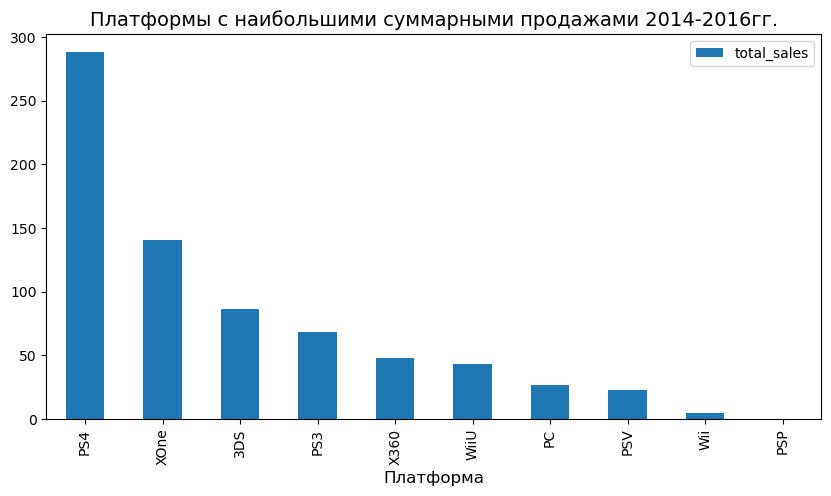

In [33]:
(
    games_actual
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values('total_sales', ascending=False)
    .plot(kind='bar', figsize=(10, 5))
    )
plt.title(label = "Платформы с наибольшими суммарными продажами 2014-2016гг.",
          fontsize = 14)
plt.xlabel( "Платформа", size = 12);

Здесь мы видим актуальные продажи игр по 3-ем платформам PS4, XOne, 3DS.

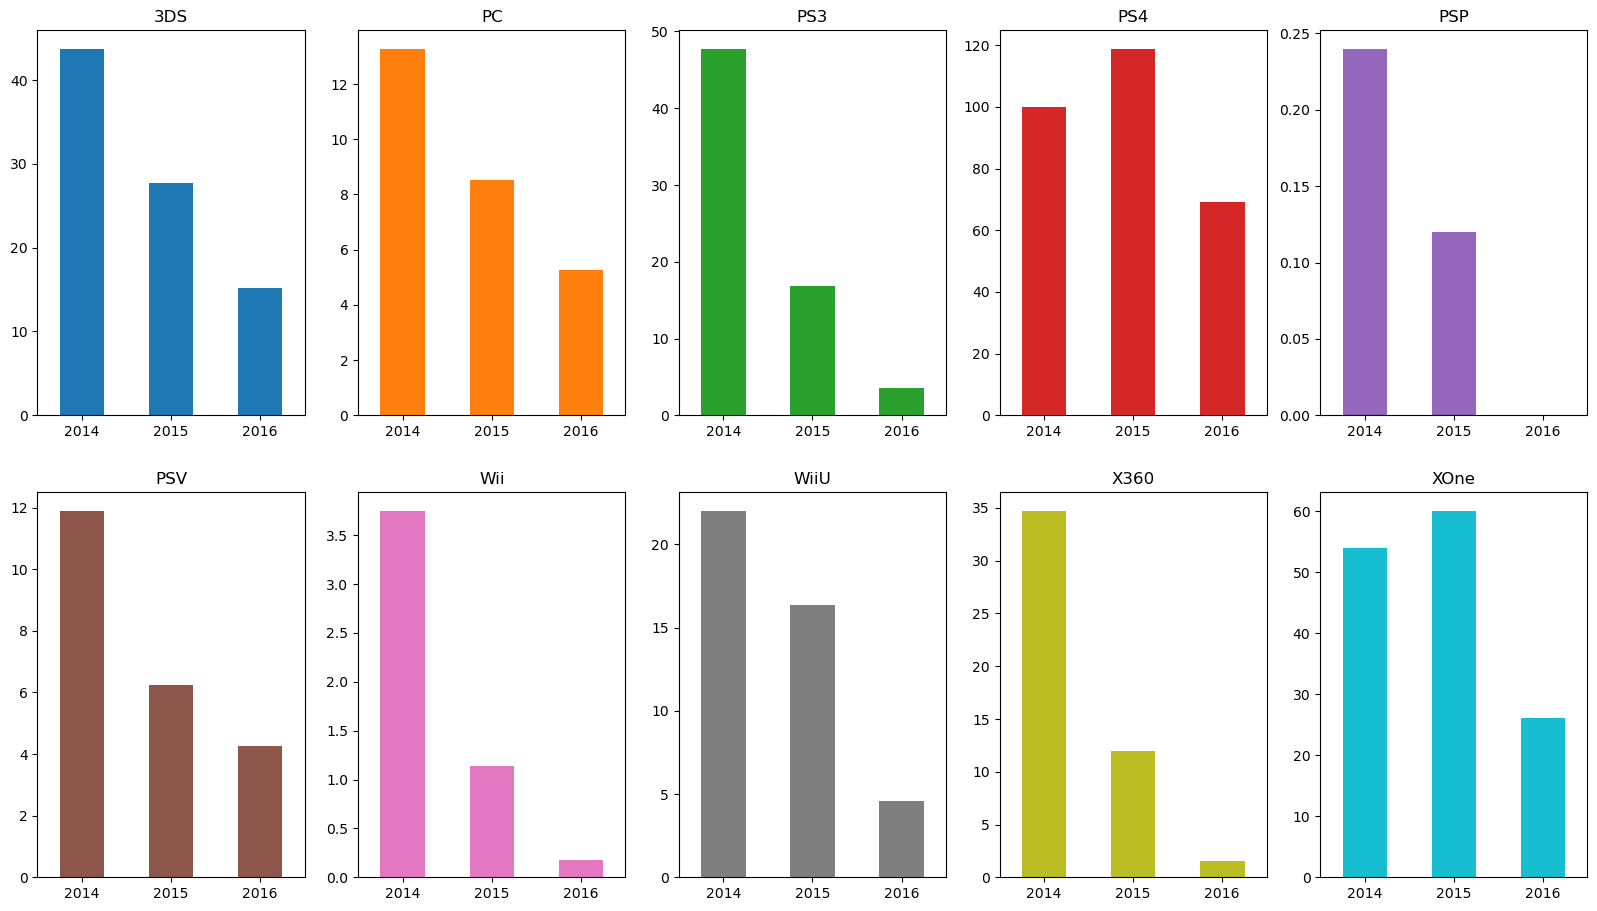

In [34]:
(
    games_actual
    .pivot_table(
        index='year_of_release',
        columns = 'platform',
         values='total_sales', 
         aggfunc='sum')
    .plot(
        subplots=True,
        kind='bar',
        figsize=(20,11),
        rot=0,
        sharex=False,
        legend=False,
        layout=(2, 5),
        xlabel = '')            
)
plt.show()

- **PS4** По анализу данных мы видим за последние 3 года игры платформы пользуется спросом, хотя последний год мы учитываем данные не до конца, так как сейчас период Декабрь 2016.
- **XOne** Так же из лидирующих платформ,и мы видим, что за последние 3 года игры платформы пользуется спросом,только меньше в 2 раза по сравнению с платформой PS4.
- **3DS** По анализу данных мы видим за последние 3 года у платформы происходит спад.
- **PS3,X360** Так же для наглядности мы можем увидеть спад по платформам так как на замену им пришли новые платформы, PS4 и XOne. Так же зачастую спад происходит из-за появлением со временем пиратских версий игр, поэтому данные прошлый моделей резко опускаются.
- **WiiU** Как мы можем увидеть имеет большие показатели по объему продаж, но так же снижается актуальность к 2016г.
- **PC, PSV, Wii** маленькие объемы по продажам, и так же ближе к 2016 году спроса
- **PSP** и вовсе закончились продажи в 2015 году.

**Рекомендации**

Перспективные платформы, если смотреть по грфику и по выводам, можем увидеть, что нужно делать акцент на платформы PS4 и XOne так как у них наибольшие продажи в целом и на последний год. Но даже  на падающих продажах можно заработать, когда объем составляет около 15-20 млн. копий, как например с 3DS
        
30-тилетняя история персональных компьютеров говорит, что игры для PC можно включить в рекомендацию

### **3.5** Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишием результат.

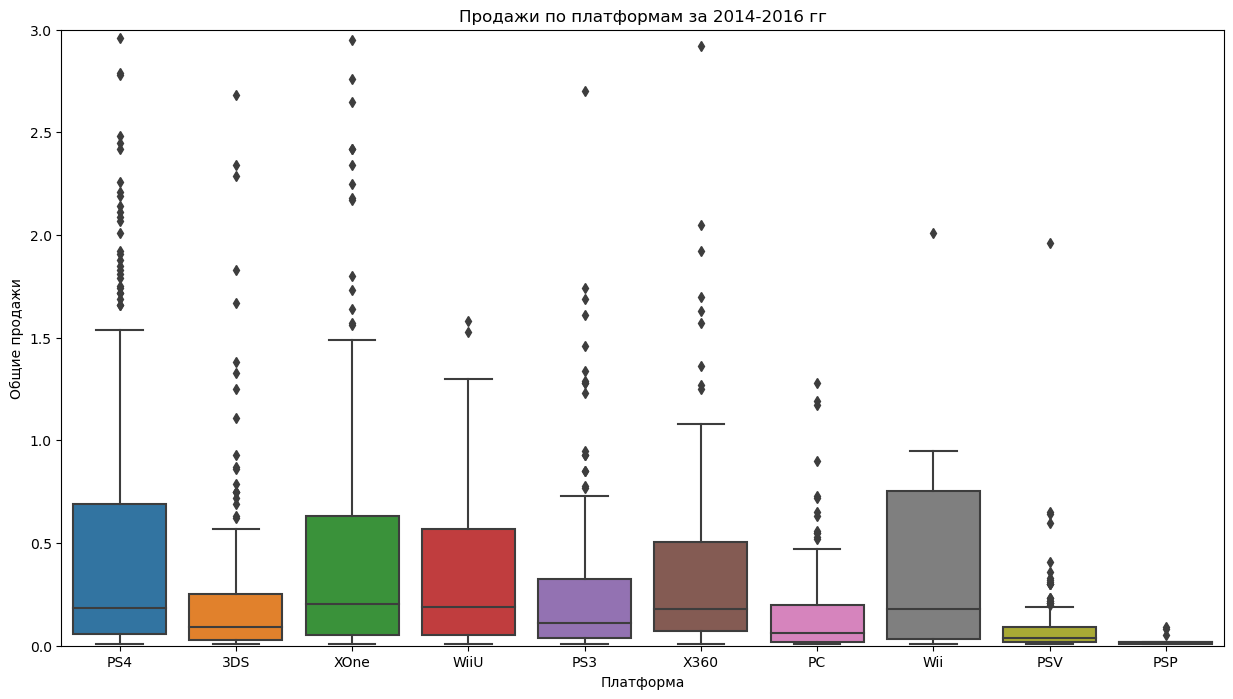

In [35]:
result_sales = plt.figure(figsize = (15,8))
(
sns.boxplot(data = games_actual, x = 'platform', y = 'total_sales')
    .set(title = 'Продажи по платформам за 2014-2016 гг',
     xlabel = 'Платформа', 
     ylabel = 'Общие продажи', 
     ylim=(0, 3)))
plt.show()

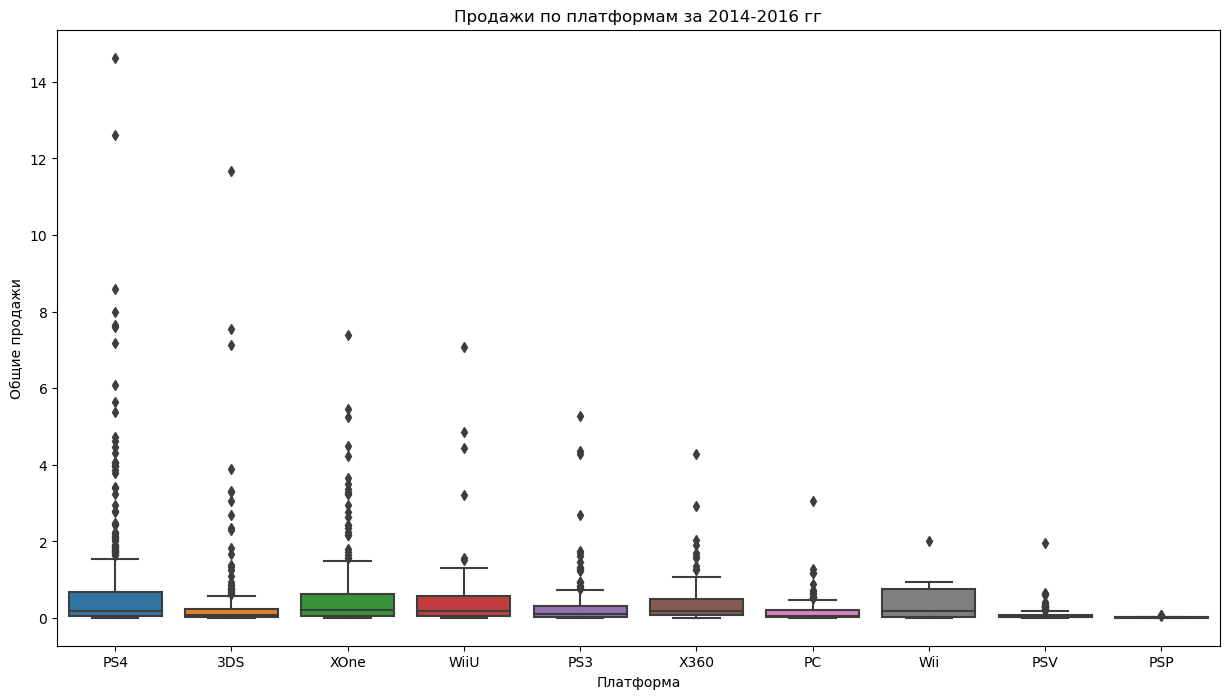

In [36]:
result_sales = plt.figure(figsize = (15,8))
(
sns.boxplot(data = games_actual, x = 'platform', y = 'total_sales')
    .set(title = 'Продажи по платформам за 2014-2016 гг',
     xlabel = 'Платформа', 
     ylabel = 'Общие продажи'))
plt.show()

In [37]:
(
games_actual
 .pivot_table(index = 'platform',
              values = ['total_sales'])
)

,total_sales
platform,
3DS,0.408868
PC,0.179139
PS3,0.311324
PS4,0.766356
PSP,0.027692
PSV,0.075932
Wii,0.460909
WiiU,0.588767
X360,0.434414


**Промежуточный вывод**

Из графика видно, что практически по всем платформам существуют выбросы. Приблизительно равны среднее арифметическое значение продаж у платформ PS4,WiiU и XOne. Из данного анализа следует, что большей популярностью пользуются уже вышеуказанные платформы PS4, WiiU и XOne.

Показатель по Wii тоже показывает высокие показатель на графике но по данным среднее арифметически показатель ниже 3х популярных платформ

### **3.6** Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

In [38]:
# Выберем популярную платформу
platform_ps4 = games_actual.query('platform == "PS4"')

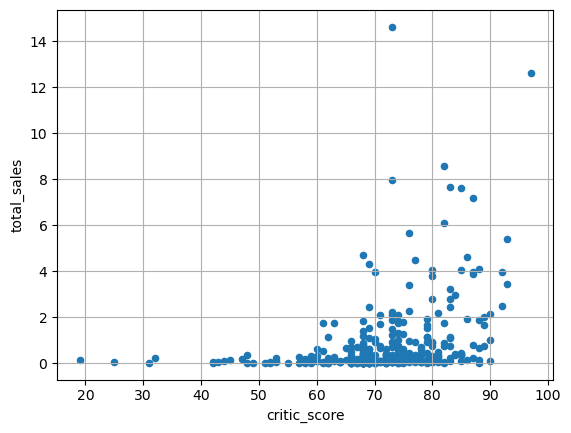

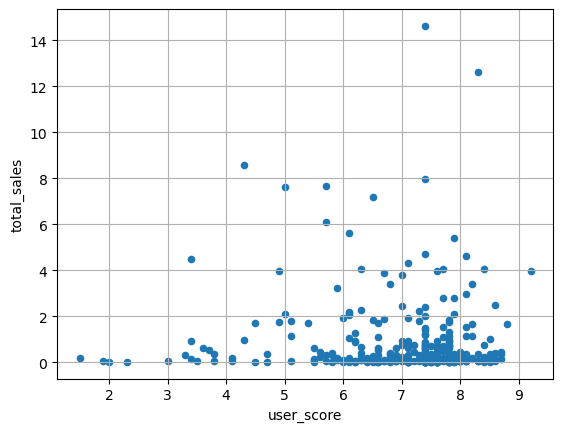

Корреляция между отзывами и продажей: 

Корреляция критиков и продажими: 0.3460894170440656
Корреляция пользователей и продажими: -0.06709467337892866


In [39]:
(platform_ps4.plot(
    x='critic_score',
    y='total_sales',
    kind='scatter',
    grid=True));
(platform_ps4.plot(
    x='user_score',
    y='total_sales',
    kind='scatter',
    grid=True));
plt.show()

print('Корреляция между отзывами и продажей:','\n')
print('Корреляция критиков и продажими:',
    platform_ps4['critic_score'].corr(platform_ps4['total_sales']))
print('Корреляция пользователей и продажими:',
    platform_ps4['user_score'].corr(platform_ps4['total_sales']))

Оценка критиков для платформы PS4 имеет слабое влияние на продажи (коэфф. 0,34), оценка пользователей на продажи не влияет

### **3.7** Соотнесём выводы с продажами игр на других платформах.

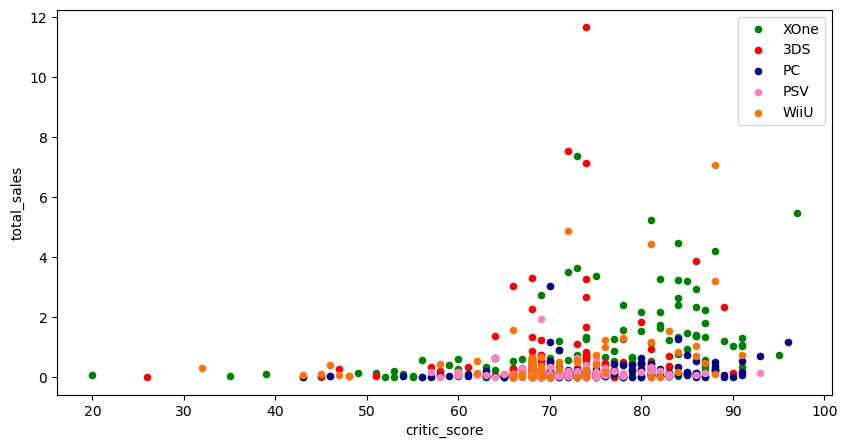

Корреляция между отзывами и продажей:
Корреляция критиков и продажими: 
 XOne: 0.3941108280719495 
 3DS: 0.17003413216827276 
 PC: 0.2063170218544067 
 PSV: 0.15826256011107467 
 WiiU 0.3491175432623125


In [40]:
platform_xone = games_actual[games_actual['platform'] == 'XOne']
platform_3ds = games_actual[games_actual['platform'] == '3DS']
platform_pc = games_actual[games_actual['platform'] == 'PC']
platform_psv = games_actual[games_actual['platform'] == 'PSV']
platform_wiiu = games_actual[games_actual['platform'] == 'WiiU']

ax = platform_xone.plot(x='critic_score', y='total_sales', kind='scatter',
                        c='#008000', label='XOne',figsize = (10,5))
platform_3ds.plot(x='critic_score', y='total_sales', kind='scatter', ax=ax,
                  c='#FF0000', label='3DS')
platform_pc.plot(x='critic_score', y='total_sales', kind='scatter', ax=ax,
                 c='#000080', label='PC')
platform_psv.plot(x='critic_score', y='total_sales', kind='scatter', ax=ax,
                  c='#FF81C0', label='PSV')
platform_wiiu.plot(x='critic_score', y='total_sales', kind='scatter', ax=ax,
                   c='#F97306', label='WiiU')

plt.show()

print('Корреляция между отзывами и продажей:')
print('Корреляция критиков и продажими:','\n', 
'XOne:',platform_xone['critic_score'].corr(platform_xone['total_sales']),'\n',
'3DS:',platform_3ds['critic_score'].corr(platform_3ds['total_sales']),'\n',
'PC:',platform_pc['critic_score'].corr(platform_pc['total_sales']),'\n',
'PSV:',platform_psv['critic_score'].corr(platform_psv['total_sales']),'\n',
'WiiU',platform_wiiu['critic_score'].corr(platform_wiiu['total_sales'])
    )

Оценка критиков для остальных актуальных платформ имеет слабое влияние на продажи, из всех выделяется только показатели по XOne(0.39)

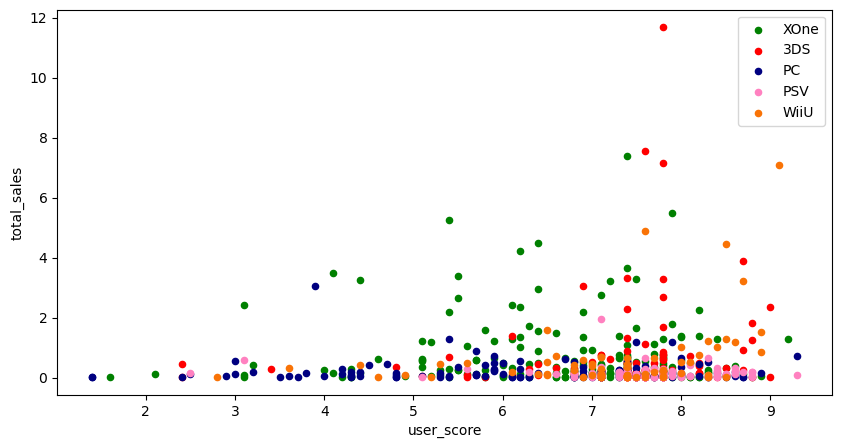

Корреляция между отзывами и продажей:
Корреляция пользователей и продажими: 
 XOne: -0.09853048267615326 
 3DS: 0.0972663680449135 
 PC: -0.09764600630626129 
 PSV: -0.07411419994861519 
 WiiU 0.3383424144579309


In [41]:
platform_xone = games_actual[games_actual['platform'] == 'XOne']
platform_3ds = games_actual[games_actual['platform'] == '3DS']
platform_pc = games_actual[games_actual['platform'] == 'PC']
platform_psv = games_actual[games_actual['platform'] == 'PSV']
platform_wiiu = games_actual[games_actual['platform'] == 'WiiU']

ax = platform_xone.plot(x='user_score', y='total_sales', kind='scatter',
                        c='#008000',label='XOne',figsize = (10,5))
platform_3ds.plot(x='user_score', y='total_sales', kind='scatter', ax=ax,
                    c='#FF0000', label='3DS')
platform_pc.plot(x='user_score', y='total_sales', kind='scatter', ax=ax,
                    c='#000080', label='PC')
platform_psv.plot(x='user_score', y='total_sales', kind='scatter', ax=ax,
                    c='#FF81C0', label='PSV')
platform_wiiu.plot(x='user_score', y='total_sales', kind='scatter', ax=ax,
                    c='#F97306', label='WiiU')

plt.show()

print('Корреляция между отзывами и продажей:')
print('Корреляция пользователей и продажими:','\n', 
'XOne:',platform_xone['user_score'].corr(platform_xone['total_sales']),'\n',
'3DS:',platform_3ds['user_score'].corr(platform_3ds['total_sales']),'\n',
'PC:',platform_pc['user_score'].corr(platform_pc['total_sales']),'\n',
'PSV:',platform_psv['user_score'].corr(platform_psv['total_sales']),'\n',
'WiiU',platform_wiiu['user_score'].corr(platform_wiiu['total_sales'])
    )

Оценка пользователей на продажи в целом не влияет, только показатели по платформе WiiU имеет влияние, но слабое (0.32 коэффициент)

### **3.8** Общее распределение игр по жанрам

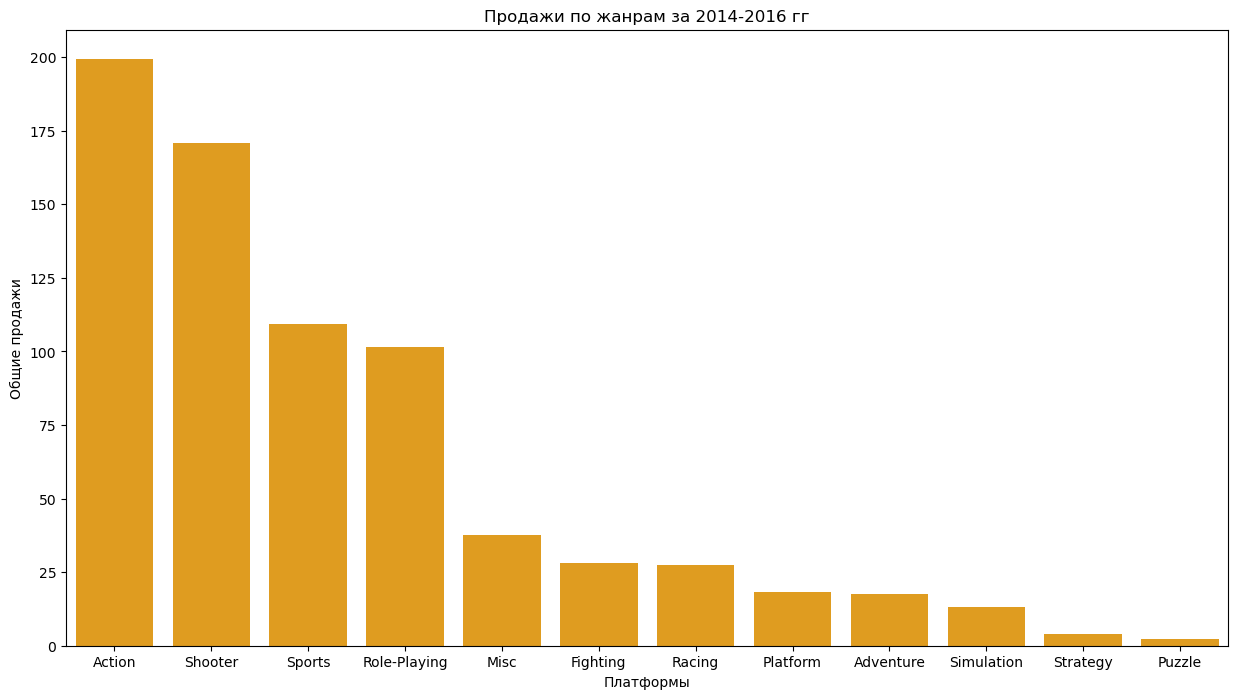

In [42]:
plt.figure(figsize=(15, 8))
genre_sales_actual = (games_actual.pivot_table(
    index='genre',
    values='total_sales',
    aggfunc='sum')
    .sort_values('total_sales',ascending=False)
    )
(sns.barplot(
    data = genre_sales_actual,
    x = genre_sales_actual.index, 
    y = 'total_sales', color = 'orange')
    .set(title = 'Продажи по жанрам за 2014-2016 гг', 
         xlabel = 'Платформы', 
         ylabel = 'Общие продажи'))
plt.show()

**Промежуточный вывод**

Здесь мы видим, что самыми продоваемыми жанрами являются Action продажи более 175 млн, Shooter около 150 млн, Role-Playing и Sports около 90 млн.

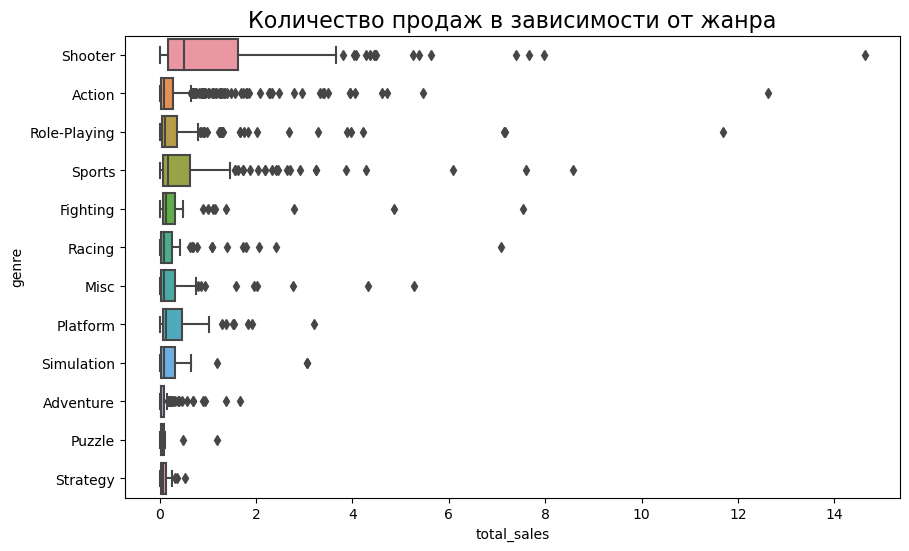

In [43]:
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x='total_sales', y='genre', data=games_actual)
plt.title('Количество продаж в зависимости от жанра', size=16);

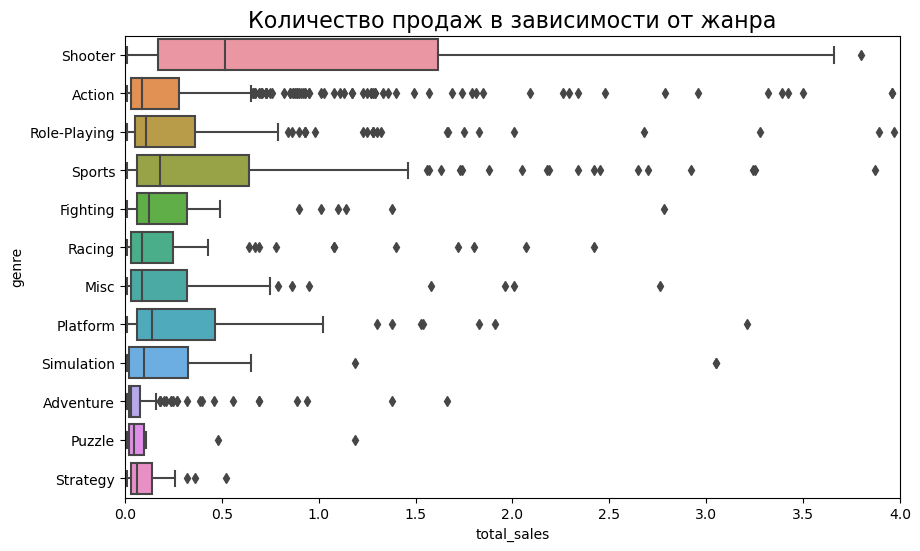

In [44]:
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x='total_sales', y='genre', data=games_actual)
plt.title('Количество продаж в зависимости от жанра', size=16)
plt.xlim(0, 4);

In [45]:
(
games_actual
 .pivot_table(index = 'genre',
              values = ['total_sales'],
             aggfunc = ['median'])
)

,median
,total_sales
genre,
Action,0.090
Adventure,0.030
Fighting,0.125
Misc,0.090
Platform,0.140
Puzzle,0.045
Racing,0.090
Role-Playing,0.110


У жанра Shooter идет больше всех показатель по медианной значениям продаж, дальше идут Sports, Platform

## **4. Составим портрет пользователя каждого региона**

### **4.1** Самые популярные платформы (топ-5). Опишем различия в долях продаж.

In [46]:
#Сортировка для добавления в others
na_sales = games_actual.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
other = na_sales[na_sales.values <20]
na_sales = na_sales[na_sales.values >20]
na_sales['others'] = na_sales.sum()

eu_sales = games_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
other = eu_sales[eu_sales.values <16]
eu_sales = eu_sales[eu_sales.values >16]
eu_sales['others'] = eu_sales.sum()

jp_sales = games_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
other = jp_sales[jp_sales.values <7]
jp_sales = jp_sales[jp_sales.values >7]
jp_sales['others'] = jp_sales.sum()

In [47]:
# check
games_actual.groupby('platform')['na_sales'].sum().sort_values(ascending=False)

platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
WiiU    19.36
PC       7.23
PSV      2.52
Wii      2.08
PSP      0.00
Name: na_sales, dtype: float64

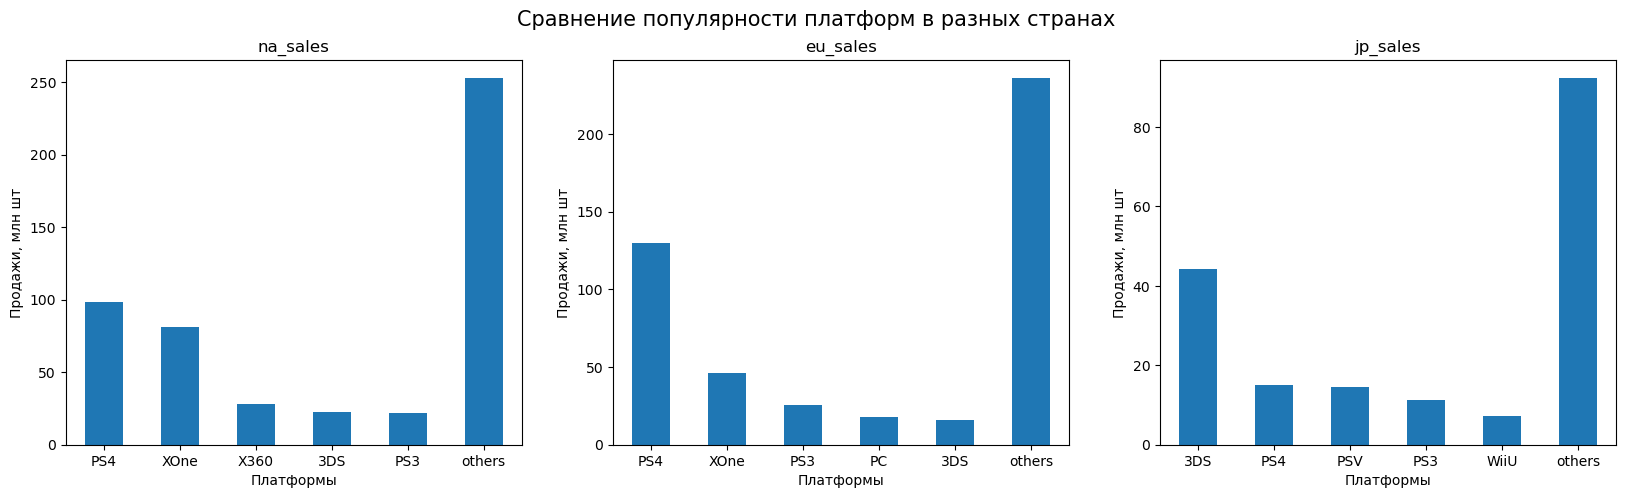

In [48]:
# визуализация
plt.subplot(1, 3, 1) 
na_sales.plot.bar(x='platform',rot=0, figsize =(20, 5),legend=False,                           
                xlabel = 'Платформы',
                ylabel = 'Продажи, млн шт',
                title = 'na_sales')
plt.subplot(1, 3, 2) 
eu_sales.plot.bar(x='platform',rot=0, figsize =(20, 5),legend=False,
                xlabel = 'Платформы',
                ylabel = 'Продажи, млн шт',
                title = 'eu_sales')
plt.subplot(1, 3, 3)
jp_sales.plot.bar(x='platform',rot=0, figsize =(20, 5),legend=False,
                xlabel = 'Платформы',
                ylabel = 'Продажи, млн шт',
                title = 'jp_sales')
plt.suptitle('Сравнение популярности платформ в разных странах', fontsize=15);

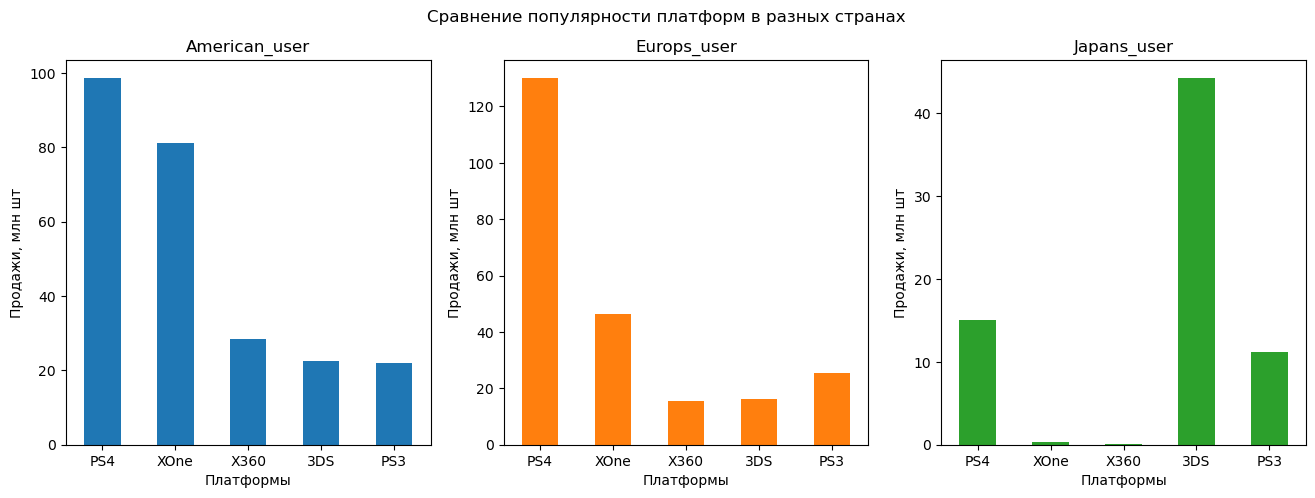

In [49]:
#Второй вариант сумма проданных копий для Северной Америки, Европы, Японии по платформам
sales_region_platf = (games_actual
                      .groupby('platform')[['na_sales','eu_sales','jp_sales']]
                      .agg('sum')
                      # сделал ограничени по платформам'(отсортировал,и выбарл первые 5)'
                      .sort_values(by='na_sales', ascending=False)[:5])

sales_region_platf = (
    pd.concat([sales_region_platf], axis=1).reset_index()
)
sales_region_platf.columns = ['platform', 'American_user', 'Europs_user', 'Japans_user']
sales_region_platf.plot.bar(subplots=True,x='platform',rot=0, figsize =(16, 5),layout=(1, 3),legend=False,
                           xlabel = 'Платформы',
                           ylabel = 'Продажи, млн шт',
                           title = 'Сравнение популярности платформ в разных странах');

In [50]:
# Доля продаж по платформам в актуальном периоде по платформам
sales_region_platf['percent-NA'] = (sales_region_platf['American_user'] / 
    sales_region_platf['American_user'].sum() *100)
sales_region_platf['percent-EUR'] = (sales_region_platf['Europs_user'] / 
    sales_region_platf['Europs_user'].sum()*100)
sales_region_platf['percent-Jap'] = (sales_region_platf['Japans_user'] / 
    sales_region_platf['Japans_user'].sum() *100)
sales_region_platf

,platform,American_user,Europs_user,Japans_user,percent-NA,percent-EUR,percent-Jap
0,PS4,98.61,130.04,15.02,38.996322,55.705963,21.190745
1,XOne,81.27,46.25,0.32,32.139044,19.812371,0.451467
2,X360,28.30,15.49,0.08,11.191521,6.635538,0.112867
3,3DS,22.64,16.12,44.24,8.953217,6.905415,62.415350
4,PS3,22.05,25.54,11.22,8.719896,10.940713,15.829571


- для пользователей Америки самыми популярными платформами являются PS4 (100 млн. шт) и XOne (более 80 млн. шт), платформы X360(более 20 млн. шт), 3DS и PS3 имеют примерно одинаковые кол-во продаж
- для пользователей Европы самыми популярными платформами также являются PS4 (130 млн. шт) и XOne (более 50 млн. шт), платформы X360,3DS имеют одинаковые кол-во продаж (около 19 млн. шт), PS3 (около 20 млн. шт)
- для пользователей Японии самой популярной платформой является 3DS (около 50 млн. шт), платформы PS4 и PS3 имеют одинаковые кол-во продаж (ниже 19 млн. шт), самыми не популярными платформами являются XOne, X360

### **4.2** Самые популярные жанры (топ-5). Поясним разницу.

In [51]:
na_sales = games_actual.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
other = na_sales[na_sales.values <15]
na_sales = na_sales[na_sales.values >15]
na_sales['others'] = na_sales.sum()

eu_sales = games_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
other = eu_sales[eu_sales.values <14]
eu_sales = eu_sales[eu_sales.values >14]
eu_sales['others'] = eu_sales.sum()

jp_sales = games_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
other = jp_sales[jp_sales.values <4]
jp_sales = jp_sales[jp_sales.values >4]
jp_sales['others'] = jp_sales.sum()

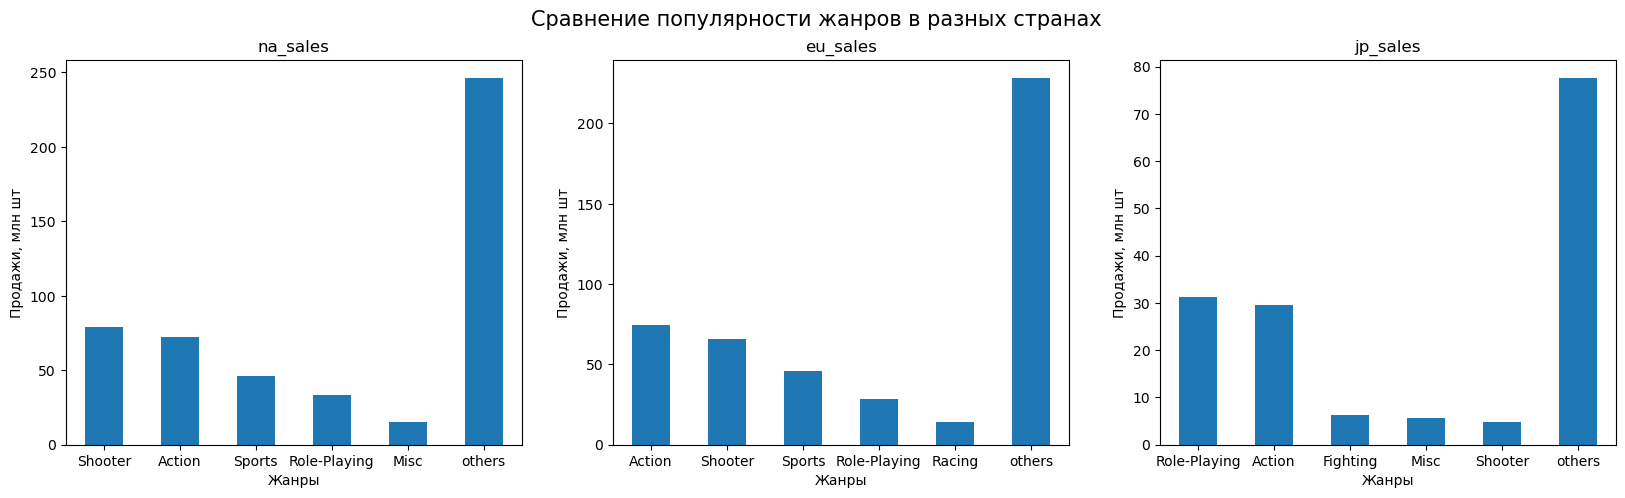

In [52]:
# визуализация
plt.subplot(1, 3, 1) 
na_sales.plot.bar(x='platform',rot=0, figsize =(20, 5),legend=False,                           
                xlabel = 'Жанры',
                ylabel = 'Продажи, млн шт',
                title = 'na_sales')
plt.subplot(1, 3, 2) 
eu_sales.plot.bar(x='platform',rot=0, figsize =(20, 5),legend=False,
                xlabel = 'Жанры',
                ylabel = 'Продажи, млн шт',
                title = 'eu_sales')
plt.subplot(1, 3, 3)
jp_sales.plot.bar(x='platform',rot=0, figsize =(20, 5),legend=False,
                xlabel = 'Жанры',
                ylabel = 'Продажи, млн шт',
                title = 'jp_sales')
plt.suptitle('Сравнение популярности жанров в разных странах', fontsize=15);

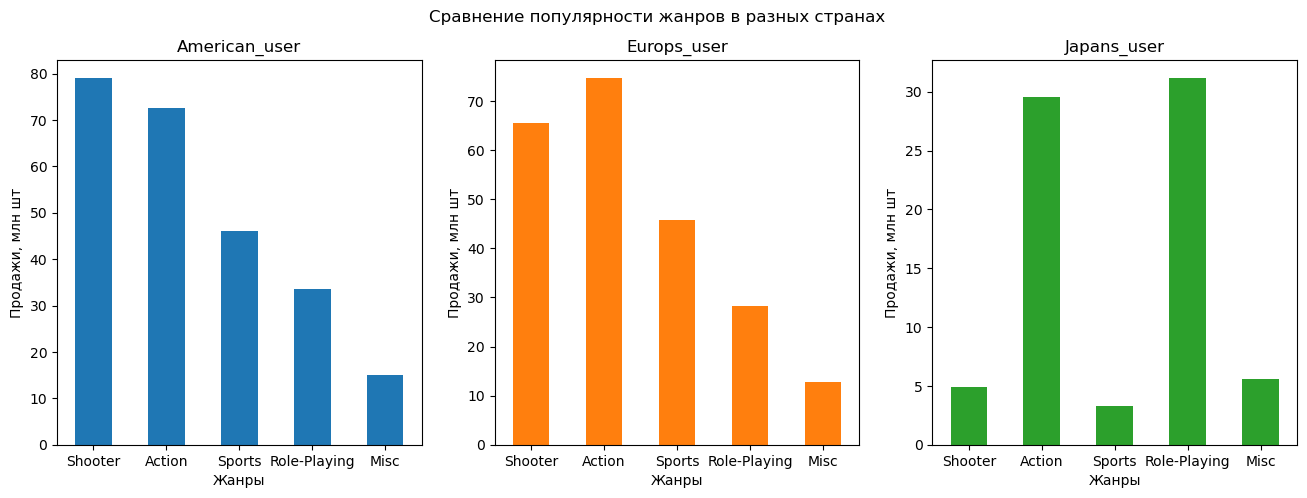

In [53]:
# Воторой вариант сумма проданных копий для Северной Америки, Европы, Японии по жанрам
sales_genre_platf = (games_actual
                     .groupby('genre')[['na_sales','eu_sales','jp_sales']]
                     .agg('sum')
                     .sort_values(by='na_sales', ascending=False)[:5])

sales_genre_platf = (
    pd.concat([sales_genre_platf], axis=1).reset_index()
)
sales_genre_platf.columns = ['genre', 'American_user', 'Europs_user', 'Japans_user']
sales_genre_platf.plot.bar(subplots=True,x='genre',rot=0, figsize =(16, 5),layout=(1, 3),legend=False,
                           xlabel = 'Жанры',
                           ylabel = 'Продажи, млн шт',
                           title = 'Сравнение популярности жанров в разных странах');

In [54]:
# Доля продаж по платформам в актуальном периоде по жанрам
sales_genre_platf['percent-NA'] = (sales_genre_platf['American_user'] / 
    sales_genre_platf['American_user'].sum() *100)
sales_genre_platf['percent-EUR'] = (sales_genre_platf['Europs_user'] / 
    sales_genre_platf['Europs_user'].sum()*100)
sales_genre_platf['percent-Jap'] = (sales_genre_platf['Japans_user'] / 
    sales_genre_platf['Japans_user'].sum() *100)
sales_genre_platf

,genre,American_user,Europs_user,Japans_user,percent-NA,percent-EUR,percent-Jap
0,Shooter,79.02,65.52,4.87,32.095857,28.868523,6.538668
1,Action,72.53,74.68,29.58,29.459789,32.904477,39.715360
2,Sports,46.13,45.73,3.26,18.736799,20.148925,4.377014
3,Role-Playing,33.47,28.17,31.16,13.594639,12.411879,41.836735
4,Misc,15.05,12.86,5.61,6.112916,5.666197,7.532223


- для пользователей Америки самыми популярными жанрами являются Shooter (более 70 млн. шт) и Action (более 60 млн. шт), жанры Sports (45 млн. шт) и Role-Playing (30 млн. шт), самыми не популярными жанрами в Америке являются Strategy и Puzzle.
- для пользователей Европы самыми популярными жанрами также являются Action ( 65 млн. шт) и Shooter (60 млн. шт), жанры Sports(45 млн. шт) и Role-Playing(25 млн. шт), самыми не популярными жанрами в Европе также являются Strategy и Puzzle.
- для пользователей Японии самыми популярными жанрами с подавляющим преимуществом являются Role-Playing и Action (около 25 млн. шт), затем следуют несолько жанров Fighting, Shooter, Misc, Sports, самыми не популярными жанрами в Японии являются Strategy и Puzzle.

### **4.3** Влияет ли рейтинг ESRB на продажи в отдельном регионе?

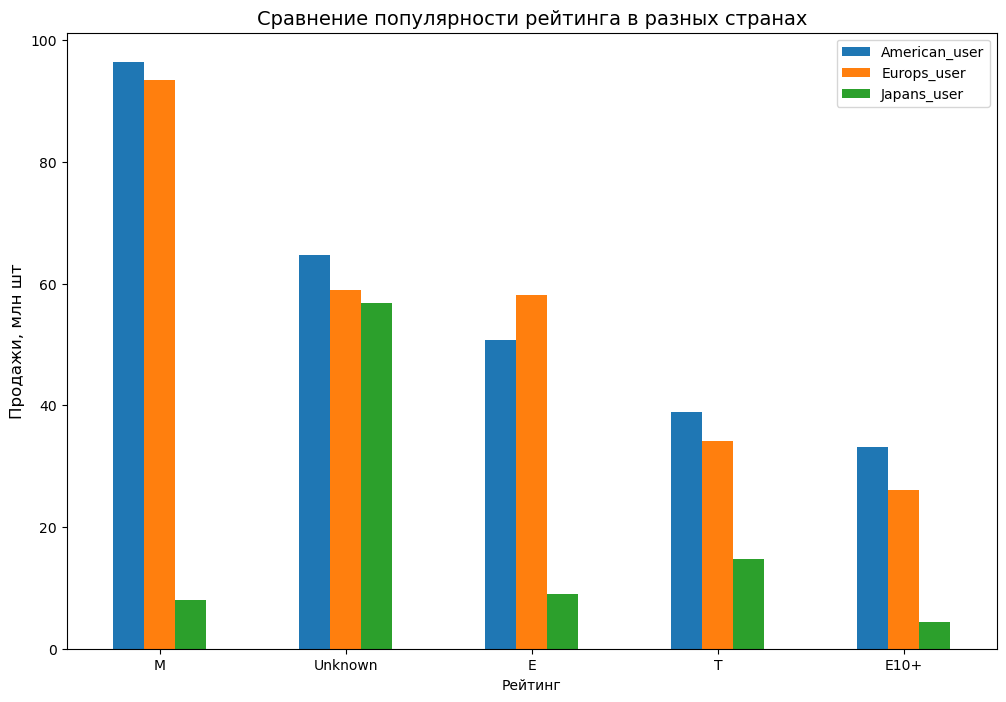

In [55]:
# сумма проданных копий для Северной Америки, Европы, Японии по рейтингу
sales_rating_platf = (games_actual
                      .groupby('rating')[['na_sales','eu_sales','jp_sales']]
                      .agg('sum'))

sales_rating_platf = (
    pd.concat([sales_rating_platf], axis=1).reset_index()
    .sort_values(by='na_sales', ascending=False)
)
sales_rating_platf.columns = ['rating', 'American_user', 'Europs_user', 'Japans_user']
sales_rating_platf.plot.bar(x='rating',rot=0, figsize =(12, 8))
plt.title('Сравнение популярности рейтинга в разных странах', fontsize=14)
plt.xlabel('Рейтинг', fontsize=10)
plt.ylabel('Продажи, млн шт',fontsize=12);

In [56]:
# Доля продаж по платформам в актуальном периоде по рейтингу
sales_rating_platf['percent-NA'] = (sales_rating_platf['American_user'] / 
    sales_rating_platf['American_user'].sum() *100)
sales_rating_platf['percent-EUR'] = (sales_rating_platf['Europs_user'] / 
    sales_rating_platf['Europs_user'].sum()*100)
sales_rating_platf['percent-Jap'] = (sales_rating_platf['Japans_user'] / 
    sales_rating_platf['Japans_user'].sum() *100)
sales_rating_platf

,rating,American_user,Europs_user,Japans_user,percent-NA,percent-EUR,percent-Jap
2,M,96.42,93.44,8.01,33.943533,34.520467,8.604576
4,Unknown,64.72,58.95,56.90,22.783919,21.778484,61.123644
0,E,50.74,58.06,8.94,17.862423,21.449682,9.603609
3,T,38.95,34.07,14.78,13.711892,12.586818,15.877108
1,E10+,33.23,26.16,4.46,11.698233,9.664549,4.791062


- для пользователей Америки и Европы самые популярные игры с рейтингом М (более 80 млн. шт), затем следуют игры с неопределенным рейтингом Unknown (более 50 млн. шт), далее соответственно с рейтингом Е, Т и Е10+. Можно сказать, что в Америке и Европе пользователи отдают предпочтение одинаковым играм с одним и тем же рейтингом.
- для пользователей Япони иная картина влияния рейтингов игр на продажи. Самыми популярными являются игры с рейтингом Unknown (50 млн. шт), затем с рейтингом Т, М,Е и Е10+.

## **5. Проверим гипотезы**

### **5.1** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

**Нулевая гипотеза**: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Альтернативная гипотеза**: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [57]:
H_0 = games_actual[games_actual['platform'] == 'XOne']['user_score']
H_a = games_actual[games_actual['platform'] == 'PC']['user_score']

results = st.ttest_ind(H_0,H_a,equal_var=False)

alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.05074473945849195
Не получилось отвергнуть нулевую гипотезу


Значение pvalue получилось больше нашего уровня значимости. То есть наши данные не противоречат нулевой гипотезе: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

In [58]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


### **5.2** Средние пользовательские рейтинги жанров Action и Sports разные

**Нулевая гипотеза**: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

**Альтернативная гипотеза**: Средние пользовательские рейтинги жанров Action и Sports различаются.

In [59]:
H_0 = games_actual[games_actual['genre'] == 'Action']['user_score']
H_a = games_actual[games_actual['genre'] == 'Sports']['user_score']

results = st.ttest_ind(H_0,H_a)

alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.2740824489804524e-34
Отвергаем нулевую гипотезу


Вероятность получить выраженные различия между средними случайно - близко к нулю. То есть, мы приходим к выводу, что получить такие данные в рамках этой гипотезы вряд ли возможно. Тогда мы отвергаем нулевую гипотезу и принимаем альтернативную о разных средних значений рейтингов жанров Action и Sports.

# **6. Общий вывод**

**В ходе выполнения данного проекта:**
- Проведен обзор данных и выполнена предобработка данных, выявлены недостатки в данных, были обработаны пропуски, в некоторых случаях строки были удалены за ненадобностью, также были расчитаны суммарные продажи по регионам и записаны в отдельный столбец 'total_sales'.

**Проведен исследовательский анализ.**

- Построен график количества игр выпускавшихся в разные годы.
- Построен график как менялись продажи по платформам. Указаны платформы с - наибольшими продажами и распределение по годам.
- По итогам анализа данных, выбран соответствующий актуальный период.
- Построен график зависимости продаж от типа платформ за актуальный период.
- Построен график «ящик с усами» по продажам игр в разбивке по платформам.
- Проведен анализ влияния на продажи отзывов пользователей и критиков. Построена диаграмма рассеяния и расчитан коэффициент корреляции между отзывами и продажами

**Вывод:**

- Как мы видим по графику рост продаж игр начался с 2000х годов, затем идет небольшой застой на промежутке 2002-2004г. Рост и пик продаж был, начиная с 2005 до 2009г. Поэтому для анализа мы должны делать акцент на данные за последние 10 лет.
- Здесь мы можем увидеть платформы с наибольшими суммарными продажами, и мы можем выделить 6 платформ:PS2,X360,Wii,PS3,DS,PS.
- Основной фактор — эти данные помогут построить прогноз на 2017 год. имеет смысл проводить анализ по последние 3 года(2016г.включительно), так как мы видели спад происходил после 2013 года.
- Из анализа графика «ящик с усами» следует,что практически по всем платформам существуют выбросы. Приблизительно равны среднее арифметическое значение продаж у платформ PS4,WiiU и XOne. Из данного анализа следует, что большей популярностью пользуются уже вышеуказанные платформы PS4, WiiU и XOne.
- Из построенных диаграмм рассеяния и расчета коэффициента корреляции по каждой платформе между отзывами и продажами видно, что оценки критиков для всех платформ практически не влияют или имеют очень слабое влияние на продажи. Оценки пользователей также имеют очень слабое влияние на продажи и не влияют совсем.

**Составлен портрет пользователя каждого региона.**

Определены для пользователя каждого региона (NA, EU, JP) самые популярные платформы, жанры, а также влияние рейтинга ESRB на продажи в регионах.Так же посчитали какую долю на актуальном рынке они занимают:
- для пользователей Америки популярные игры с рейтингом М(34%), жанр Shooter(32%), платформа PS4(39%)
- для пользователей Европы популярные игры с рейтингом М(34%), жанр Ation(33%), платформа PS4(56%)
- для пользователей Японии популярные игры с рейтингом Unkniown(61%) , жанр Role - Playning(42%), платформа 3DS(62%)

**Вывод:** Предпочтения пользователей Америки и Европы схожи, самыми популярными платформами являются PS4 и XOne, любимые жанры - Shooter и Action, игры с рейтингом М и Unknown. В связи с этим особое внимание стоит обратить на указанные платформы и жанры игр. Предпочтения пользователей из Японии отличаются, самой популярной платформой являются 3DS, любимые жанры - Role-Playing и Action и игры с рейтингом Unknown.

**Проведена проверка двух гипотез:**
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.

**Результаты проверки гипотез:**
- Первая гипотеза: Отвергаем нулевую гипотезу.
- Вторая гипотеза: Принимаем альтернативную гипотезу.